<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week1/ML_1_3_Linear_Regression_in_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pylab as plt
import pandas as pd
import seaborn as sns

In [ ]:
plt.style.use ('seaborn')

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
%cd /content/drive/MyDrive/SciSchool/week1

/content/drive/MyDrive/SciSchool/week1


In [ ]:
!kaggle datasets download -d ishaanthareja007/company-sales -p data

  0% 0.00/1.82k [00:00<?, ?B/s]
100% 1.82k/1.82k [00:00<00:00, 58.1kB/s]


In [ ]:
!ls data

company-sales.zip


In [ ]:
!unzip data/company-sales.zip -d data

Archive:  data/company-sales.zip
  inflating: data/company.csv        


In [ ]:
df= pd.read_csv ('data/company.csv')
df.head (5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Figure size 720x432 with 0 Axes>

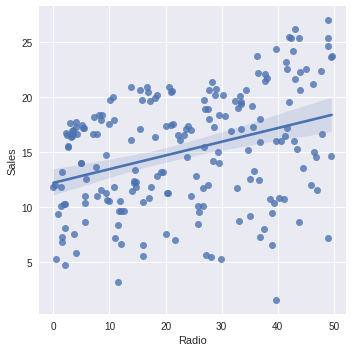

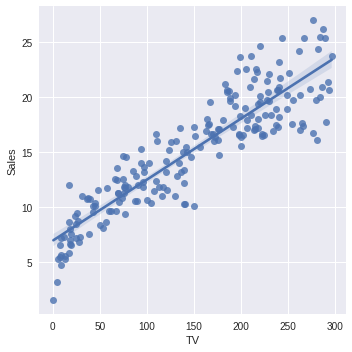

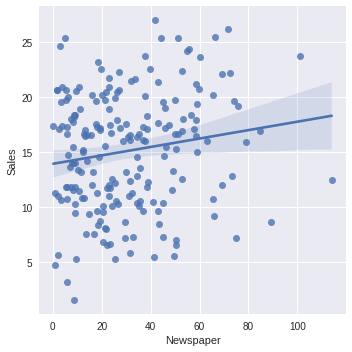

In [ ]:
plt.figure(figsize=(10,6))

sns.lmplot (x='Radio', y= 'Sales', data=df)
sns.lmplot (x='TV', y= 'Sales', data=df)
sns.lmplot (x='Newspaper', y= 'Sales', data=df)

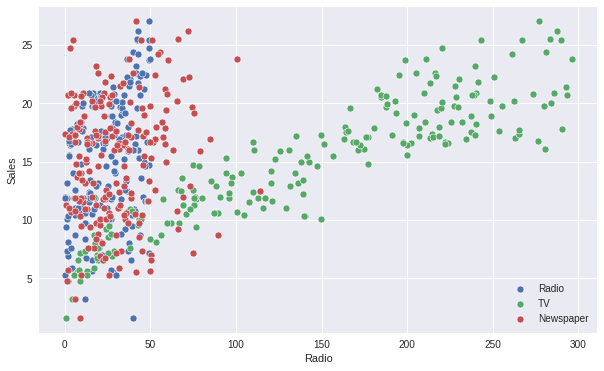

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Radio',y='Sales',data=df, label='Radio')
sns.scatterplot(x='TV',y='Sales',data=df, label='TV')
sns.scatterplot(x='Newspaper',y='Sales',data=df, label='Newspaper')

plt.legend ()

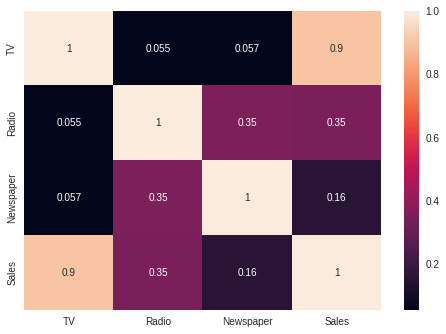

In [ ]:
sns.heatmap(df.corr(), annot=True)

#Data manipulation

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
X= df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit (X, y)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.054446
Radio,0.107001
Newspaper,0.000336


# Train test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit (X_train, y_train)

LinearRegression()

In [ ]:
predictions= model.predict (X_test)

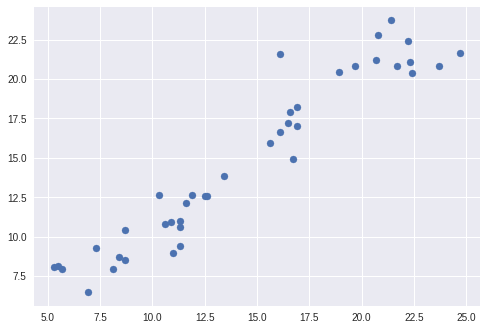

In [ ]:
plt.scatter (y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


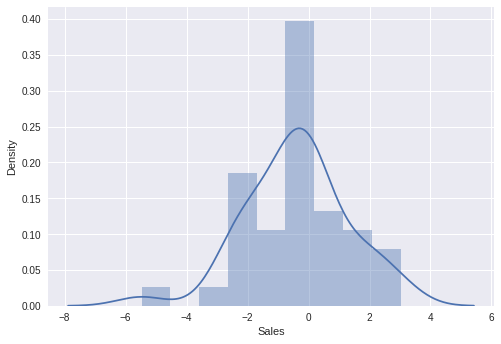

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Regression Evaluation



**Mean Absolute Error** (MAE):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2748262109549338
MSE: 2.9077569102710896
RMSE: 1.7052146229349223
